In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from Configs import getEnvConfig, visualizeEnvConfig, getPredictorConfig, visualizePredictorConfig
from EnvLibs import PolicyDemoAdaptiveAlpha, PolicySimulator, createEnv
from MdpSolverLibs import MdpKernel

In [2]:
configIdx = 0
envParams = getEnvConfig(configIdx)
visualizeEnvConfig(envParams)
predictorParams = getPredictorConfig(configIdx)
visualizePredictorConfig(predictorParams)
trafficDataParentPath = f'Results/TrafficData'
env = createEnv(envParams, trafficDataParentPath)
env.selectMode(mode="test", type="data")

Environment Configuration
Number of Users:        4
Window Length:          200
Dataflow:               thumb_fr
N_aggregation:          4
Resource Bar:           5
Bandwidth:              100
M List:                 [3, 4, 5]
Random Seed:            999
Alpha Range:            (0.01, 1.0)
Discrete Alpha Steps:   10
Predictor Configuration
Window Length:          200
Upsample K:             10
Dataflow:               thumb_fr
DB Parameter:           0.001
Alpha:                  0.01
Mode:                   fixed
Direction:              forward
Train Ratio:            0.6
Train Data Augment:     False
Smooth Fc:              1.5
Smooth Order:           3


(100, 4)
(100, 4)


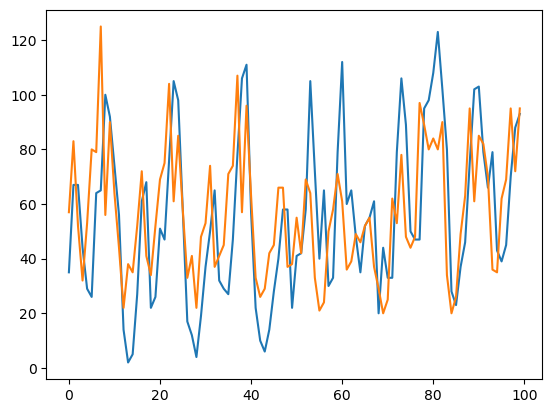

In [3]:
env.reset()
env.selectMode(mode="test", type="data")
u_record = []
u_predicted_record = []
for _ in range(100):
    env.updateStates()
    u, u_predicted = env.getStates()
    u_record.append(u)
    u_predicted_record.append(u_predicted)

u_record = np.array(u_record)
u_predicted_record = np.array(u_predicted_record)
print(u_record.shape)
print(u_predicted_record.shape)
plt.plot(u_record[:,0].flatten())
plt.plot(u_predicted_record[:,0].flatten())
plt.show()

avg_reward_mdp: 0.010559099512433506, avg_reward_adaptive: 0.014080787524387631


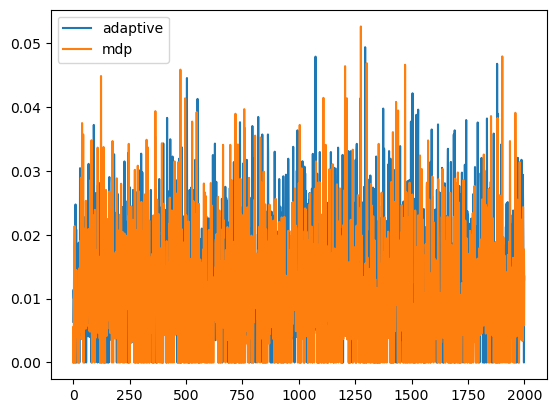

In [4]:
# ==== Prepare Policy====
with open(f'Results/MdpPolicy/mdpKernelParams_config{configIdx}.pkl', 'rb') as f:
    mdpKernelParams = pickle.load(f)
mdpPolicy = MdpKernel()
mdpPolicy.load_policy(mdpKernelParams, policyMode="stochastic")
adaptiveAlphaPolicy = PolicyDemoAdaptiveAlpha(envParams)

# ==== Prepare Simulator====
num_windows = 2000
obvMode = "predicted" # "perfect" or "predicted"
policySimulator = PolicySimulator(mdpPolicy, env)
simResultMdp = policySimulator.runSimulation(mdpPolicy, num_windows=num_windows, obvMode=obvMode, mode="test", type="data")
simResultAdaptive = policySimulator.runSimulation(adaptiveAlphaPolicy, num_windows=num_windows, obvMode=obvMode, mode="test", type="data")

print(f"avg_reward_mdp: {np.mean(simResultMdp['rewardRecord'])}, avg_reward_adaptive: {np.mean(simResultAdaptive['rewardRecord'])}")

plt.plot(simResultAdaptive['rewardRecord'], label="adaptive")
plt.plot(simResultMdp['rewardRecord'], label="mdp")
plt.legend()
plt.show()

In [5]:
V = mdpKernelParams['V']
print(V.shape)
print(V)

(256,)
[98.95241926 98.95118296 98.94988147 98.94789441 98.95118296 98.94995144
 98.94865258 98.94667593 98.94988147 98.94865258 98.947363   98.94541173
 98.94789441 98.94667593 98.94541173 98.94351706 98.95118296 98.94995144
 98.94865258 98.94667593 98.94995144 98.9487331  98.94744714 98.94549437
 98.94865258 98.94744714 98.94618032 98.94426479 98.94667593 98.94549437
 98.94426479 98.9424201  98.94988147 98.94865258 98.947363   98.94541173
 98.94865258 98.94744714 98.94618032 98.94426479 98.947363   98.94618032
 98.94494182 98.94307476 98.94541173 98.94426479 98.94307476 98.94129216
 98.94789441 98.94667593 98.94541173 98.94351706 98.94667593 98.94549437
 98.94426479 98.9424201  98.94541173 98.94426479 98.94307476 98.94129216
 98.94351706 98.9424201  98.94129216 98.9396104  98.95118296 98.94995144
 98.94865258 98.94667593 98.94995144 98.9487331  98.94744714 98.94549437
 98.94865258 98.94744714 98.94618032 98.94426479 98.94667593 98.94549437
 98.94426479 98.9424201  98.94995144 98.9487